#  Data Structures- Space and Time Complexity
> Observing the time complexity of different algorithms
- toc: true
- image: /images/python.png
- categories: []
- type: pbl
- week: 27

# Space and Time Complexity
> Space complexity refers to the amount of memory used by an algorithm to complete its execution, as a function of the size of the input. The space complexity of an algorithm can be affected by various factors such as the size of the input data, the data structures used in the algorithm, the number and size of temporary variables, and the recursion depth. Time complexity refers to the amount of time required by an algorithm to run as the input size grows. It is usually measured in terms of the "Big O" notation, which describes the upper bound of an algorithm's time complexity.

> Why do you think a programmer should care about space and time complexity?
- If a program becomes too complex, it will take too much computational power and time to run and it could crash your computer.

Take a look at our lassen volcano example from the data compression tech talk. The first code block is the original image. In the second code block, change the baseWidth to rescale the image. 

In [ ]:
from IPython.display import Image, display
from pathlib import Path 

# prepares a series of images
def image_data(path=Path("images/"), images=None):  # path of static images is defaulted
    for image in images:
        # File to open
        image['filename'] = path / image['file']  # file with path
    return images

def image_display(images):
    for image in images:  
        display(Image(filename=image['filename']))

if __name__ == "__main__":
    lassen_volcano = image_data(images=[{'source': "Peter Carolin", 'label': "Lassen Volcano", 'file': "lassen-volcano.jpg"}])
    image_display(lassen_volcano)
    

---- meta data -----
Lassen Volcano
Peter Carolin
JPEG
RGB
Original size:  (2792, 2094)  pixels:  5,846,448
Scaled size:  (2500, 1875)  pixels:  4,687,500
-- original image --



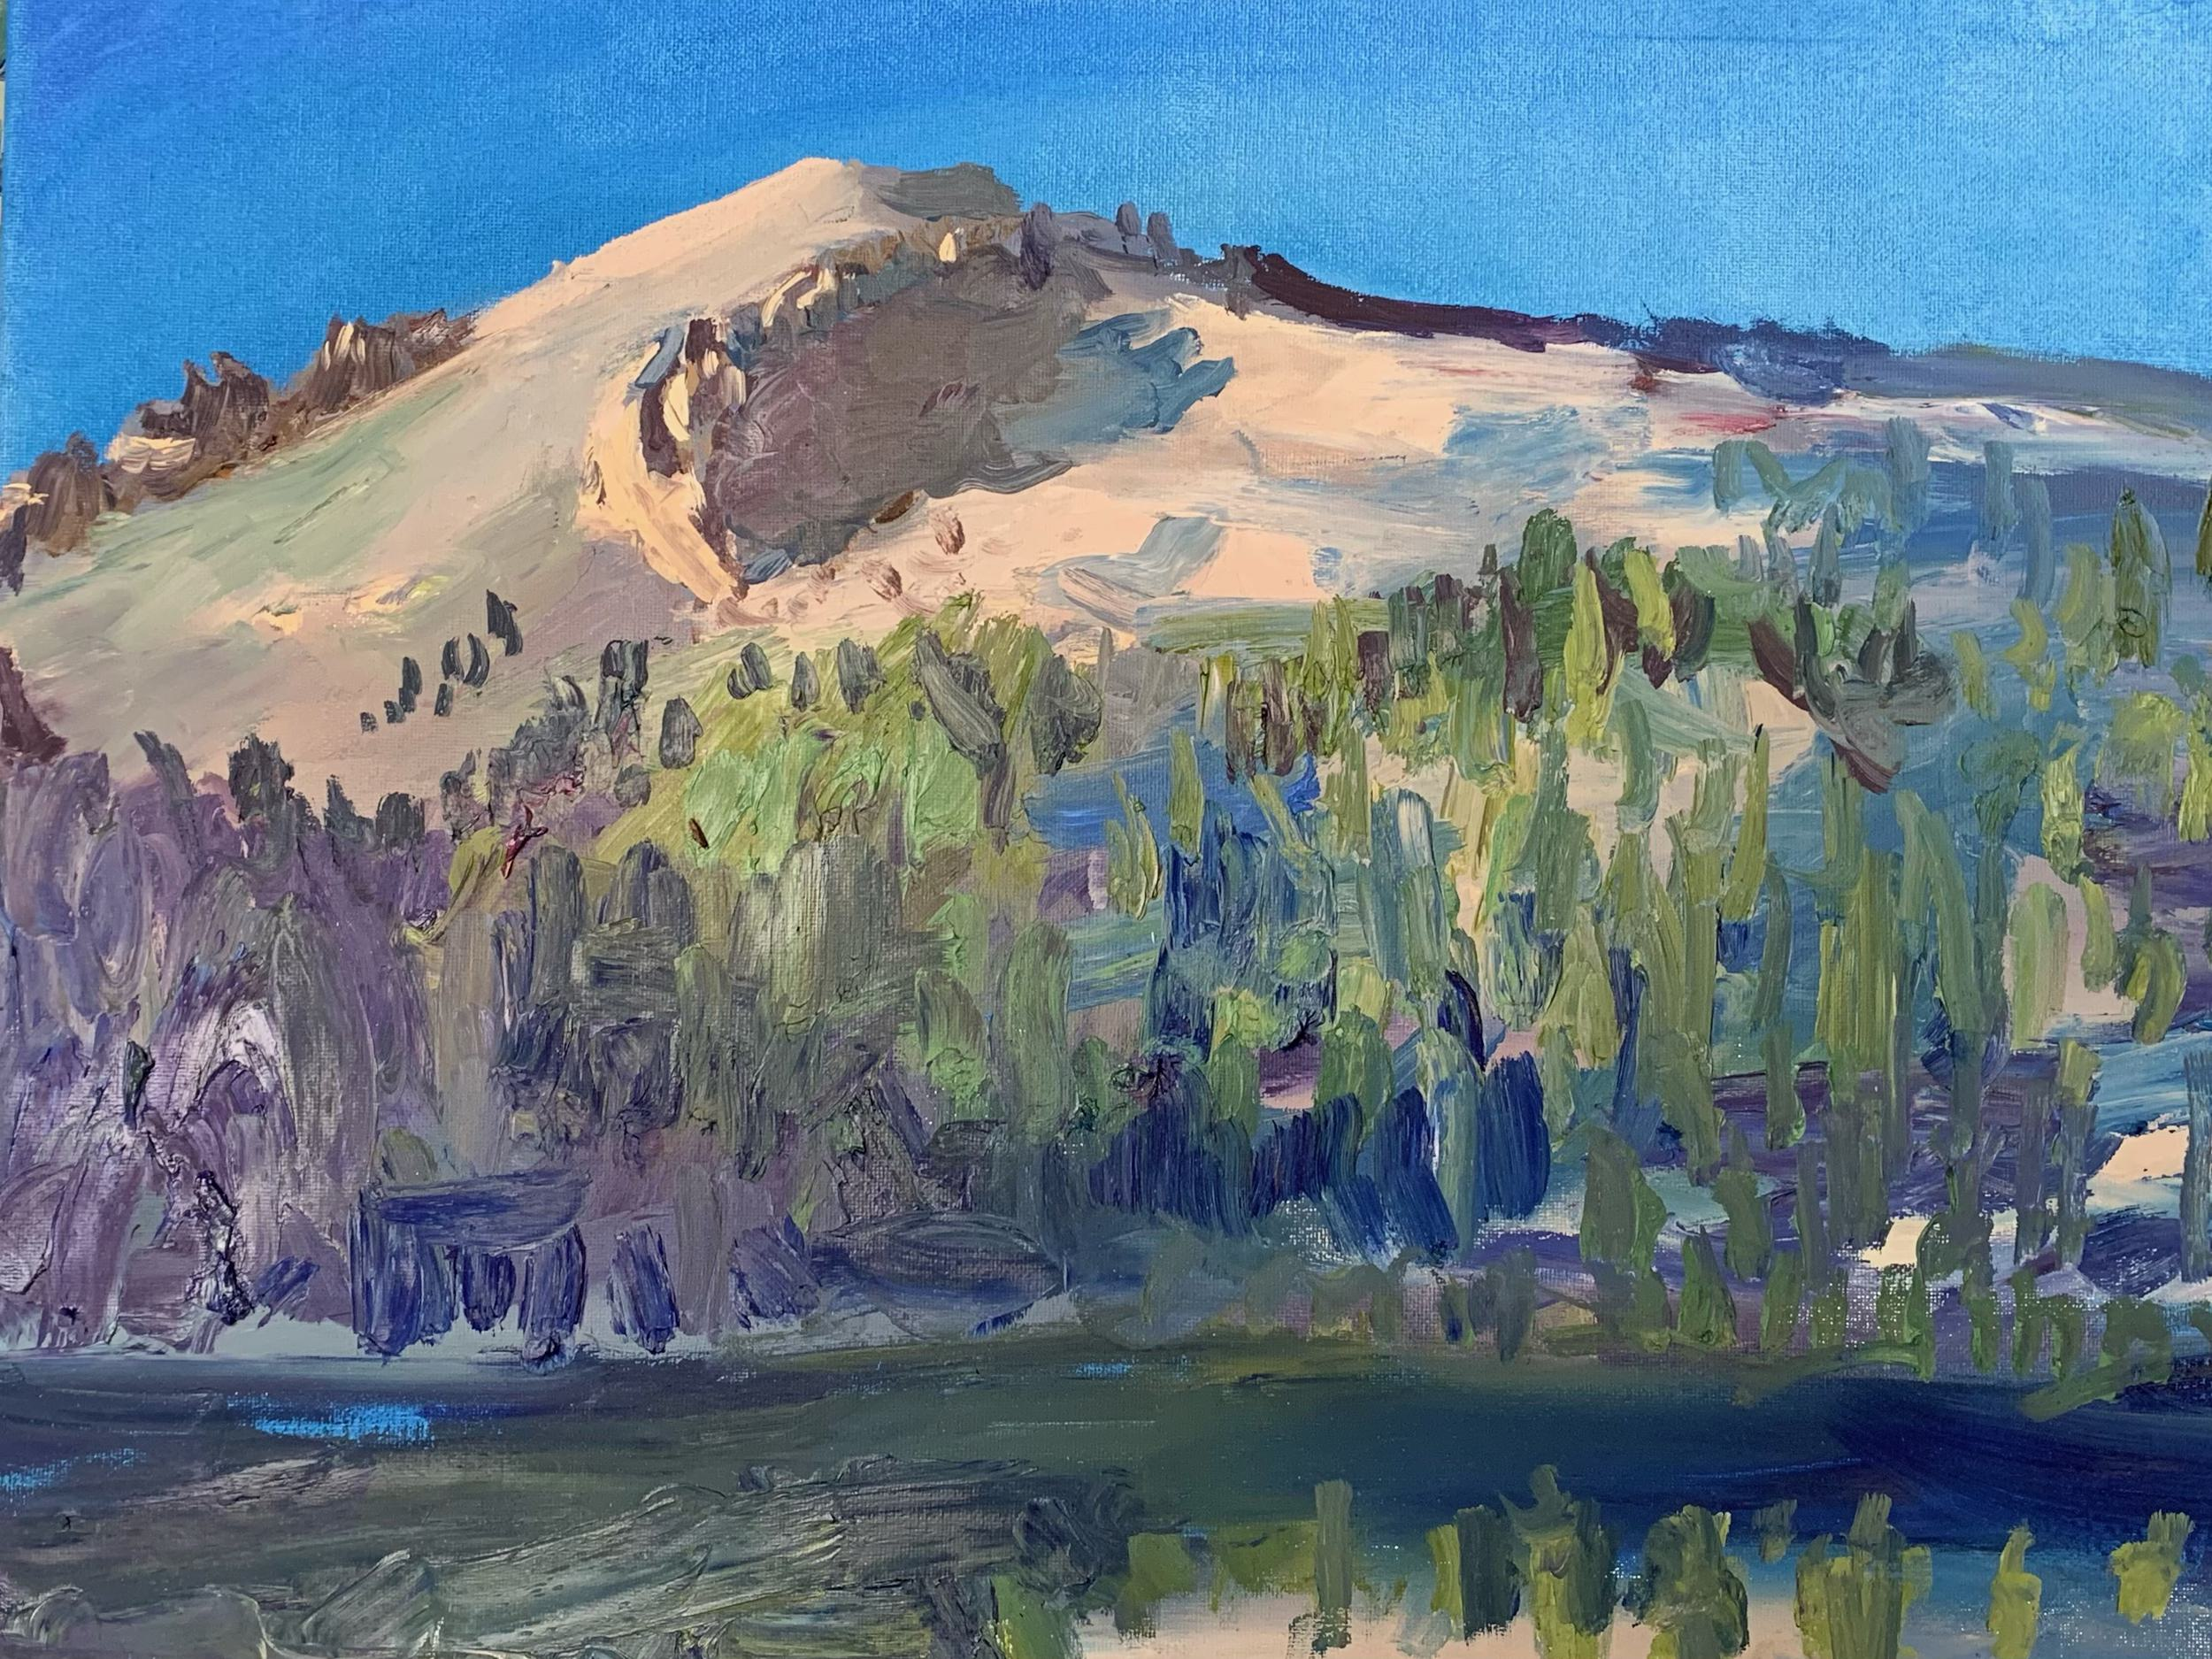

In [2]:
from IPython.display import HTML, display
from pathlib import Path 
from PIL import Image as pilImage 
from io import BytesIO
import base64

# prepares a series of images
def image_data(path=Path("images/"), images=None):  # path of static images is defaulted
    for image in images:
        # File to open
        image['filename'] = path / image['file']  # file with path
    return images

def scale_image(img):
    # baseWidth = 625
    #baseWidth = 1250
    baseWidth = 2500
    # baseWidth = 5000 # see the effect of doubling or halfing the baseWidth 
    # # baseWidth = 10000 
    # baseWidth = 20000
    # baseWidth = 40000 <----- this killed my kernel
    scalePercent = (baseWidth/float(img.size[0]))
    scaleHeight = int((float(img.size[1])*float(scalePercent)))
    scale = (baseWidth, scaleHeight)
    return img.resize(scale)

def image_to_base64(img, format):
    with BytesIO() as buffer:
        img.save(buffer, format)
        return base64.b64encode(buffer.getvalue()).decode()
    
def image_management(image):  # path of static images is defaulted        
    # Image open return PIL image object
    img = pilImage.open(image['filename'])
    
    # Python Image Library operations
    image['format'] = img.format
    image['mode'] = img.mode
    image['size'] = img.size
    image['width'], image['height'] = img.size
    image['pixels'] = image['width'] * image['height']
    # Scale the Image
    img = scale_image(img)
    image['pil'] = img
    image['scaled_size'] = img.size
    image['scaled_width'], image['scaled_height'] = img.size
    image['scaled_pixels'] = image['scaled_width'] * image['scaled_height']
    # Scaled HTML
    image['html'] = '<img src="data:image/png;base64,%s">' % image_to_base64(image['pil'], image['format'])


if __name__ == "__main__":
    # Use numpy to concatenate two arrays
    images = image_data(images = [{'source': "Peter Carolin", 'label': "Lassen Volcano", 'file': "lassen-volcano.jpg"}])
    
    # Display meta data, scaled view, and grey scale for each image
    for image in images:
        image_management(image)
        print("---- meta data -----")
        print(image['label'])
        print(image['source'])
        print(image['format'])
        print(image['mode'])
        print("Original size: ", image['size'], " pixels: ", f"{image['pixels']:,}")
        print("Scaled size: ", image['scaled_size'], " pixels: ", f"{image['scaled_pixels']:,}")
        
        print("-- original image --")
        display(HTML(image['html'])) 


> Do you think this is a time complexity or space complexity or both problem? 
- I believe that this is both, as when the image is too large, it takes too long to render and it crashes the kernel. The space complexity leads into the time complexity.

## Big O Notation
- Constant O(1)
- Linear O(n)
- Quadratic O(n^2) 
- Logarithmic O(logn)
- Exponential (O(2^n))

In [ ]:
#create a list called numbers with 1,000 numbers in it
numbers = list(range(1000))
print(numbers)


# Constant O(1)

### Time
> An example of a constant time algorithm is accessing a specific element in an array. It does not matter how large the array is, accessing an element in the array takes the same amount of time. Therefore, the time complexity of this operation is constant, denoted by O(1).

In [ ]:
#prints the number at index 263
print(numbers[263])

ncaa_bb_ranks = {1:"Alabama",2:"Houston", 3:"Purdue", 4:"Kansas"}
#look up a value in a dictionary given a key
print(ncaa_bb_ranks[1]) 

### Space
> This function takes two number inputs and returns their sum. The function does not create any additional data structures or variables that are dependent on the input size, so its space complexity is constant, or O(1). Regardless of how large the input numbers are, the function will always require the same amount of memory to execute.

In [ ]:
#function that takes the sum of two numbers
def sum(a, b): 
  return a + b

print(sum(90,88))
print(sum(.9,.88))

# Linear O(n)

### Time
> An example of a linear time algorithm is traversing a list or an array. When the size of the list or array increases, the time taken to traverse it also increases linearly with the size. Hence, the time complexity of this operation is O(n), where n is the size of the list or array being traversed.

In [ ]:
#Iterates through the numbers list 
for i in numbers:
    print(i)

### Space
> This function takes a list of elements arr as input and returns a new list with the elements in reverse order. The function creates a new list reversed_arr of the same size as arr to store the reversed elements. The size of reversed_arr depends on the size of the input arr, so the space complexity of this function is O(n). As the input size increases, the amount of memory required to execute the function also increases linearly.

In [ ]:
def reverse_list(arr):
    n = len(arr) 
    reversed_arr = [None] * n #create a list of None based on the length or arr
    for i in range(n):
        reversed_arr[n-i-1] = arr[i] #stores the value at the index of arr to the value at the index of reversed_arr starting at the beginning for arr and end for reversed_arr 
    return reversed_arr

print(numbers)
print("Reversed:" + str(reverse_list(numbers)))

# Quadratic O(n^2)

### Time
> An example of a quadratic time algorithm is nested loops. When there are two nested loops that both iterate over the same collection, the time taken to complete the algorithm grows quadratically with the size of the collection. Hence, the time complexity of this operation is O(n^2), where n is the size of the collection being iterated over.

In [ ]:
#Iterates through the list twice creating a nested loop
for i in numbers:
    for j in numbers:
        print(i,j)

### Space
> This function takes two matrices matrix1 and matrix2 as input and returns their product as a new matrix. The function creates a new matrix result with dimensions m by n to store the product of the input matrices. The size of result depends on the size of the input matrices, so the space complexity of this function is O(n^2). As the size of the input matrices increases, the amount of memory required to execute the function also increases quadratically.

![Example of Matrix Multiplication](images/multiply_matrices.png)

- Main take away is that a new matrix is created.

In [ ]:
def multiply_matrices(matrix1, matrix2):
    m = len(matrix1) 
    n = len(matrix2[0])
    result = [[0] * n] * m #this creates the new matrix based on the size of matrix 1 and 2
    for i in range(m):
        for j in range(n):
            for k in range(len(matrix2)):
                result[i][j] += matrix1[i][k] * matrix2[k][j]
    return result

print(multiply_matrices([[1,2],[3,4]], [[3,4],[1,2]]))

# Logarithmic O(logn)

### Time
> An example of a log time algorithm is binary search. Binary search is an algorithm that searches for a specific element in a sorted list by repeatedly dividing the search interval in half. As a result, the time taken to complete the search grows logarithmically with the size of the list. Hence, the time complexity of this operation is O(log n), where n is the size of the list being searched.

In [ ]:
#function used to search for a target using a binary search
def binary_search(arr, low, high, target):
    while low <= high:
        mid = (low + high) // 2 #integer division
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            low = mid + 1
        else:
            high = mid - 1

target = 263
result = binary_search(numbers, 0, len(numbers) - 1, target)

print(result)


### Space
> The same algorithm above has a O(logn) space complexity. The function takes an array arr, its lower and upper bounds low and high, and a target value target. The function searches for target within the bounds of arr by recursively dividing the search space in half until the target is found or the search space is empty. The function does not create any new data structures that depend on the size of arr. Instead, the function uses the call stack to keep track of the recursive calls. Since the maximum depth of the recursive calls is O(logn), where n is the size of arr, the space complexity of this function is O(logn). As the size of arr increases, the amount of memory required to execute the function grows logarithmically.

# Exponential O(2^n)

### Time
> An example of an O(2^n) algorithm is the recursive implementation of the Fibonacci sequence. The Fibonacci sequence is a series of numbers where each number is the sum of the two preceding ones, starting from 0 and 1. The recursive implementation of the Fibonacci sequence calculates each number by recursively calling itself with the two preceding numbers until it reaches the base case (i.e., the first or second number in the sequence). The algorithm takes O(2^n) time in the worst case because it has to calculate each number in the sequence by making two recursive calls.

![A visualization of calculating the fibonacci sequence](images/fibonacci.webp)

In [1]:
#recrursive function to calculate the fibonacci number at n
def fibonacci(n):
    if n <= 1:
        return n
    else:
        return fibonacci(n-1) + fibonacci(n-2)

#print(fibonacci(5))
#print(fibonacci(10))
#print(fibonacci(20))
print(fibonacci(30))
# print(fibonacci(40)) <-- This caused my computer to freeze the process.

832040


### Space
> This function takes a set s as input and generates all possible subsets of s. The function does this by recursively generating the subsets of the set without the first element, and then adding the first element to each of those subsets to generate the subsets that include the first element. The function creates a new list for each recursive call that stores the subsets, and each element in the list is a new list that represents a subset. The number of subsets that can be generated from a set of size n is 2^n, so the space complexity of this function is O(2^n). As the size of the input set increases, the amount of memory required to execute the function grows exponentially.

In [9]:
def generate_subsets(s):
    if not s:
        return [[]]
    subsets = generate_subsets(s[1:])
    return [[s[0]] + subset for subset in subsets] + subsets

print(generate_subsets([1,2,3]))
print(generate_subsets([1,2,3,4,5,6]))
#print(generate_subsets(numbers))

[[1, 2, 3], [1, 2], [1, 3], [1], [2, 3], [2], [3], []]
[[1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5], [1, 2, 3, 4, 6], [1, 2, 3, 4], [1, 2, 3, 5, 6], [1, 2, 3, 5], [1, 2, 3, 6], [1, 2, 3], [1, 2, 4, 5, 6], [1, 2, 4, 5], [1, 2, 4, 6], [1, 2, 4], [1, 2, 5, 6], [1, 2, 5], [1, 2, 6], [1, 2], [1, 3, 4, 5, 6], [1, 3, 4, 5], [1, 3, 4, 6], [1, 3, 4], [1, 3, 5, 6], [1, 3, 5], [1, 3, 6], [1, 3], [1, 4, 5, 6], [1, 4, 5], [1, 4, 6], [1, 4], [1, 5, 6], [1, 5], [1, 6], [1], [2, 3, 4, 5, 6], [2, 3, 4, 5], [2, 3, 4, 6], [2, 3, 4], [2, 3, 5, 6], [2, 3, 5], [2, 3, 6], [2, 3], [2, 4, 5, 6], [2, 4, 5], [2, 4, 6], [2, 4], [2, 5, 6], [2, 5], [2, 6], [2], [3, 4, 5, 6], [3, 4, 5], [3, 4, 6], [3, 4], [3, 5, 6], [3, 5], [3, 6], [3], [4, 5, 6], [4, 5], [4, 6], [4], [5, 6], [5], [6], []]


> Using the time library, we are able to see the difference in time it takes to calculate the fibonacci function above.
- Based on what is known about the other time complexities, hypothesize the resulting elapsed time if the function is replaced. 

In [11]:
import time

start_time = time.time()
print(fibonacci(34))
end_time = time.time()

total_time = end_time - start_time
print("Time taken:", total_time, "seconds")

start_time = time.time()
print(fibonacci(35))
end_time = time.time()

total_time = end_time - start_time
print("Time taken:", total_time, "seconds")


5702887
Time taken: 2.3142709732055664 seconds
9227465
Time taken: 3.783724069595337 seconds


# Hacks
- Record your findings when testing the time elapsed of the different algorithms.
- Although we will go more in depth later, time complexity is a key concept that relates to the different sorting algorithms. Do some basic research on the different types of sorting algorithms and their time complexity.
> One method of algorithmic searching I found was Binary Search. Binary search algorithms are normally tied to constant timing (O(1)), so it's one of the fastest methods. It's a search algorithm that finds the position of a target value within a sorted array. It then goes to the middle of teh array, and plays a game of higher or lower. If it's lower, then the middle value and the upper values are all eliminated from the search. It then repeats this process until it gets to the target value.

> One method of algorthimic sorting I found was Quicksort. Quicksort uses a O(n*log(n)) time complexity, and it's fairly efficient overall. It's classified as a Divide and Conquer algorithm, which means that it finds a designated spot to pivot from, and from there it iterates around it. 

- Why is time and space complexity important when choosing an algorithm?
> Time and space complexity is important when choosing an algorithm because having algorithms with bad time and space complexity will make programs innefficient, and in some cases, inoperational.

- Should you always use a constant time algorithm / Should you never use an exponential time algorithm? Explain? 
> It really just depends. For longer datasets, exponential time algorithims are atrocious, as they take WAY too long when the datasets are large, however when it comes to small datasets, exponential tends to beat out constant time algorithms in terms of time and space.

- What are some general patterns that you noticed to determine each algorithm's time and space complexity?
> One pattern I've always noticed in terms of an algorithm's time and space complexity is that the larger the output is, the more time it takes it to run, and the greater the time complexity. No matter what type of algorithm, this pattern is always present. 

Complete the Time and Space Complexity analysis questions linked below.
[Practice](https://www.geeksforgeeks.org/practice-questions-time-complexity-analysis/)


- Q1: What is the time complexity for the following code:
> O(N + M) time, O(1) space

In [ ]:
import random
a = 0
b = 0
for i in range(N):
  a = a + random()
 
for i in range(M):
  b= b + random()

- Q2: What is the time complexity of the following code: 
> O(N*N)

In [ ]:
a = 0
for i in range(N):
  for j in reversed(range(i,N)):
    a = a + i + j

- Q3: What is the time complexity of the following code:
> O(nLogn)

In [ ]:
k = 0
for i in range(n//2,n):
  for j in range(2,n,pow(2,j)):
        k = k + n / 2

- Q4: What does it mean when we say that an algorithm X is asymptotically more efficient than Y?
> X will always be a better choice for large inputs

- Q5: What is the time complexity of the following code:
> O(log N)

In [ ]:
a = 0
i = N
while (i > 0):
    a += i
    i //= 2

- Q6: Which of the following best describes the useful criterion for comparing the efficiency of algorithms?
1. Time
2. Memory
3. Both of the above
4. None of the above

> Both of the above

- Q7: How is time complexity measured?
1. By counting the number of algorithms in an algorithm.
2. By counting the number of primitive operations performed by the algorithm on a given input size.
3. By counting the size of data input to the algorithm.
4. None of the above
> By counting the number of primitive operations performed by the algorithm on a given input size.

- Q8: What will be the time complexity of the following code?
> O(logkn)

In [ ]:
for i in range(n):
    i=i*k

- Q9: What will be the time complexity of the following code?
> n(n-1)

In [ ]:
value = 0
for i in range(n):
    for j in range(i):
	    value=value+1

- Q10: Algorithm A and B have a worst-case running time of O(n) and O(logn), respectively. Therefore, algorithm B always runs faster than algorithm A.
> False